In [8]:
import tensorflow as tf

## 1강 개발환경

In [9]:
hello = tf.constant('Hello World!')
sess = tf.Session()
print(sess.run(hello))

b'Hello World!'


## 4강 선형회귀

In [10]:
# Make input data
xData = [1, 2, 3, 4, 5, 6, 7]
yData = [25000, 55000, 75000, 110000, 128000, 155000, 180000]
# Set the randome weight and bias
W = tf.Variable(tf.random_uniform([1], -100, 100))
b = tf.Variable(tf.random_uniform([1], -100, 100))
# Placeholder
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
# Make Linear regression graph
H = W * X + b
# Set the cost
cost = tf.reduce_mean(tf.square(H - Y))
# Set the ML option
gd = tf.Variable(0.01)
optimizer = tf.train.GradientDescentOptimizer(gd)
train = optimizer.minimize(cost)
init = tf.global_variables_initializer() # 변수 초기화
sess = tf.Session()
# Train the model
sess.run(init) #초기화
for i in range(5001):
    sess.run(train, feed_dict={X: xData, Y: yData})
    if i % 500 == 0:
        print(i, sess.run(cost, feed_dict={X: xData, Y: yData}), sess.run(W), sess.run(b))
# Predict the score
print(sess.run(H, feed_dict={X: [8]}))

0 4603972000.0 [10371.117] [1997.4756]
500 8684986.0 [25539.576] [1940.0184]
1000 8633760.0 [25627.807] [1503.1002]
1500 8632677.0 [25640.662] [1439.4366]
2000 8632653.0 [25642.537] [1430.1547]
2500 8632653.0 [25642.807] [1428.8158]
3000 8632651.0 [25642.844] [1428.6323]
3500 8632656.0 [25642.848] [1428.6133]
4000 8632656.0 [25642.848] [1428.6133]
4500 8632656.0 [25642.848] [1428.6133]
5000 8632656.0 [25642.848] [1428.6133]
[206571.39]


## 6강 변수와 상수

In [11]:
# Constant
a = tf.constant(1)
b = tf.constant(2)
c = tf.add(a, b)
sess = tf.Session()
sess.run(c)

3

In [12]:
# Change variable
d = tf.Variable(3)
e = tf.add(d, b)
init = tf.global_variables_initializer()
sess.run(init)
sess.run(c)

3

## 7강 Placeholder

In [13]:
input = [1, 2, 3, 4, 5]
x = tf.placeholder(dtype=tf.float32)
y = x + 5
# 실행해보기
sess = tf.Session()
sess.run(y, feed_dict={x: input}) # feeding작업을 통해 tensor & placeholder 연결

array([ 6.,  7.,  8.,  9., 10.], dtype=float32)

In [14]:
mathScore = [85, 99, 84, 97, 92]
englishScore = [59, 80, 84, 68, 77]
a = tf.placeholder(dtype=tf.float32)
b = tf.placeholder(dtype=tf.float32)
y = (a + b)/2

sess = tf.Session()
print(sess.run(y, feed_dict={a: mathScore, b: englishScore}))

[72.  89.5 84.  82.5 84.5]


## tensorflow

In [15]:
a = tf.constant(17.5)
b = tf.constant(5.0)

In [16]:
sess = tf.Session()
add = tf.add(a, b)
sess.run(add)

22.5

In [17]:
sub = tf.subtract(a, b)
sess.run(sub)

12.5

In [18]:
mul = tf.multiply(a, b)
sess.run(mul)

87.5

In [19]:
div = tf.truediv(a, b)
sess.run(div)

3.5

In [20]:
mod = tf.mod(a, b)
sess.run(mod)

2.5

In [21]:
tfabs = tf.abs(-a)
sess.run(tfabs)

17.5

In [22]:
neg = tf.negative(a)
sess.run(neg)

-17.5

In [23]:
sign = tf.sign(a)
sess.run(sign)

1.0

In [24]:
squ = tf.square(a)
sess.run(squ)

306.25

In [25]:
pow = tf.pow(a, 2)
sess.run(pow)

306.25

In [26]:
max = tf.maximum(a, b)
sess.run(max)

17.5

In [27]:
exp = tf.exp(a)
sess.run(exp)

39824784.0

In [28]:
log = tf.log(a)
sess.run(log)

2.862201

In [29]:
a = tf.constant(17.5)
b = tf.constant(5.0)
c = tf.add(a, b)
print(c)

Tensor("Add_6:0", shape=(), dtype=float32)


## 12강 kmeans

In [39]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
df = pd.DataFrame(columns = ['x', 'y'])

df.loc[0] = [2,3]
df.loc[1] = [2,11]
df.loc[2] = [2,18]
df.loc[3] = [4,5]
df.loc[4] = [4,7]
df.loc[5] = [5,3]
df.loc[6] = [5,15]
df.loc[7] = [6,6]
df.loc[8] = [6,8]
df.loc[9] = [6,9]
df.loc[10] = [7,2]
df.loc[11] = [7,4]
df.loc[12] = [7,5]
df.loc[13] = [7,17]
df.loc[14] = [7,18]
df.loc[15] = [8,5]
df.loc[16] = [8,4]
df.loc[17] = [9,10]
df.loc[18] = [9,11]
df.loc[19] = [9,15]
df.loc[20] = [9,19]
df.loc[21] = [10,5]
df.loc[22] = [10,8]
df.loc[23] = [10,18]
df.loc[24] = [12,6]
df.loc[25] = [13,5]
df.loc[26] = [14,11]
df.loc[27] = [15,6]
df.loc[28] = [15,18]
df.loc[29] = [18,12]

df

,x,y
0,2,3
1,2,11
2,2,18
3,4,5
4,4,7
5,5,3
6,5,15
7,6,6
8,6,8
9,6,9


Text(0.29999999999999716, 0.5, 'y')

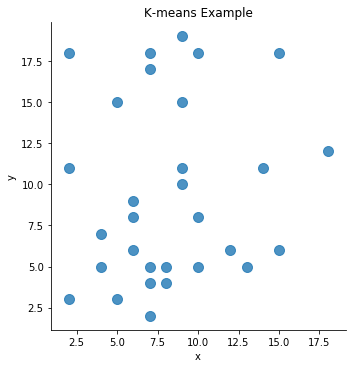

In [41]:
sb.lmplot('x', 'y', data=df, fit_reg=False, scatter_kws={"s": 100})
plt.title('K-means Example')
plt.xlabel('x')
plt.ylabel('y')

In [42]:
points = df.values # pandas to numpy
kmeans = KMeans(n_clusters = 4).fit(points)
kmeans.cluster_centers_

array([[15.66666667, 13.66666667],
       [ 5.53846154,  5.53846154],
       [ 7.        , 17.14285714],
       [11.14285714,  7.28571429]])

In [43]:
kmeans.labels_

array([1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 3, 3, 2, 2, 3,
       3, 2, 3, 3, 0, 3, 0, 0])

In [44]:
df['cluster'] = kmeans.labels_
df.head(30)

,x,y,cluster
0,2,3,1
1,2,11,1
2,2,18,2
3,4,5,1
4,4,7,1
5,5,3,1
6,5,15,2
7,6,6,1
8,6,8,1
9,6,9,1


Text(0.5, 1, 'K-means Example')

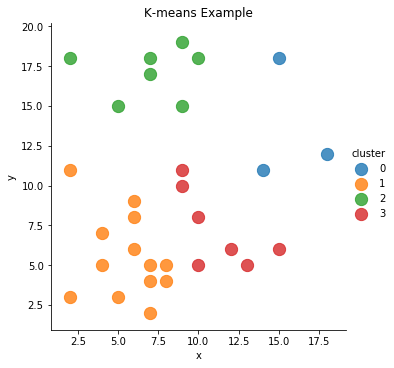

In [45]:
sb.lmplot('x', 'y', data=df, fit_reg=False, scatter_kws={"s": 150}, hue="cluster")
plt.title('K-means Example')